#### Import relevant modules

In [2]:
pip install impyute

In [0]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import impyute as impy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from impyute.imputation.cs import mice

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Import & read data 

In [0]:
#Read csv file into dataframe
df = pd.read_csv("https://raw.githubusercontent.com/mwiwids/Assignment6-DPS4/master/weatherAUS.csv")

In [7]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


#### Clean Data

In [0]:
# Drop Date, Location, Evaporation, Sunshine, Cloud3pm, Cloud9am, and RISK_MM from DataFrame because of we hypothesis it as unneeded value
df.drop(labels = ['Date','Location','Evaporation','Sunshine','Cloud3pm','Cloud9am','RISK_MM'],axis = 1,inplace = True)

In [0]:
# Replace Nilai Yes / No
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [0]:
# Convert 'WindGustDir','WindDir9am','WindDir3pm' variable into indicator variables.
categorical = ['WindGustDir','WindDir9am','WindDir3pm']
df_final = pd.get_dummies(df,columns = categorical,drop_first=True)

In [11]:
df_final.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


#### Empty Data Handler

In [12]:
df_final.isnull().sum()

MinTemp              637
MaxTemp              322
Rainfall            1406
WindGustSpeed       9270
WindSpeed9am        1348
WindSpeed3pm        2630
Humidity9am         1774
Humidity3pm         3610
Pressure9am        14014
Pressure3pm        13981
Temp9am              904
Temp3pm             2726
RainToday           1406
RainTomorrow           0
WindGustDir_ENE        0
WindGustDir_ESE        0
WindGustDir_N          0
WindGustDir_NE         0
WindGustDir_NNE        0
WindGustDir_NNW        0
WindGustDir_NW         0
WindGustDir_S          0
WindGustDir_SE         0
WindGustDir_SSE        0
WindGustDir_SSW        0
WindGustDir_SW         0
WindGustDir_W          0
WindGustDir_WNW        0
WindGustDir_WSW        0
WindDir9am_ENE         0
WindDir9am_ESE         0
WindDir9am_N           0
WindDir9am_NE          0
WindDir9am_NNE         0
WindDir9am_NNW         0
WindDir9am_NW          0
WindDir9am_S           0
WindDir9am_SE          0
WindDir9am_SSE         0
WindDir9am_SSW         0


In [13]:
# (1) drop empty data
data_deletion_df = df_final.copy()
data_deletion_df.dropna(inplace = True) 
data_deletion_df.describe(include='all')

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000
mean,12.386547,23.485962,2.320947,40.107643,14.363818,19.082239,68.289782,50.866143,1017.655685,1015.252962,17.185827,21.978666,0.221055,0.218973,0.059896,0.055030,0.068936,0.054260,0.048934,0.047412,0.057480,0.067656,0.070775,0.067581,0.064980,0.066853,0.073760,0.059838,0.067497,0.057597,0.055540,0.082348,0.053633,0.058349,0.055055,0.055531,0.062965,0.065624,0.068175,0.052563,0.058542,0.055431,0.050197,0.049093,0.057346,0.059671,0.064144,0.059386,0.047328,0.054754,0.057095,0.070934,0.072498,0.068024,0.058793,0.067238,0.069880,0.061201,0.068141
std,6.367537,6.986581,8.465116,13.479752,8.796346,8.675334,19.129275,20.691785,7.098486,7.019410,6.449422,6.832804,0.414959,0.413552,0.237296,0.228039,0.253346,0.226532,0.215731,0.212519,0.232758,0.251156,0.256450,0.251026,0.246492,0.249769,0.261382,0.237187,0.250882,0.232980,0.229032,0.274895,0.225293,0.234404,0.228088,0.229016,0.242901,0.247625,0.252046,0.223160,0.234766,0.228821,0.218351,0.216063,0.232503,0.236876,0.245011,0.236347,0.212341,0.227500,0.232025,0.256716,0.259311,0.251788,0.235237,0.250435,0.254946,0.239699,0.251989
min,-8.200000,2.600000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-3.100000,1.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.700000,18.100000,0.000000,31.000000,7.000000,13.000000,56.000000,36.000000,1013.000000,1010.500000,12.400000,16.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.100000,22.900000,0.000000,39.000000,13.000000,19.000000,69.000000,51.000000,1017.600000,1015.200000,16.800000,21.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [14]:
# (2) fill with mean
mean_fill_df = df_final.copy()
mean_fill_df = mean_fill_df.fillna(mean_fill_df.mean())
mean_fill_df.describe(include='all')

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.00000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,16.987509,21.687235,0.223423,0.224181,0.056205,0.051374,0.063526,0.049651,0.045241,0.046142,0.056283,0.062936,0.065467,0.063245,0.060552,0.061867,0.06878,0.056726,0.062598,0.054398,0.053153,0.080123,0.052935,0.055896,0.055136,0.060144,0.059729,0.064434,0.063055,0.052380,0.057928,0.058090,0.050593,0.048125,0.054321,0.058948,0.060952,0.057415,0.045319,0.054384,0.059553,0.067500,0.074990,0.064293,0.056332,0.064574,0.069701,0.060875,0.065608
std,6.388924,7.109554,8.423217,13.138385,8.851082,8.721551,18.932077,20.532065,6.746248,6.681788,6.472166,6.870771,0.414476,0.417043,0.230319,0.220760,0.243908,0.217223,0.207834,0.209792,0.230468,0.242848,0.247350,0.243404,0.238507,0.240914,0.25308,0.231319,0.242239,0.226802,0.224339,0.271485,0.223905,0.229721,0.228247,0.237754,0.236984,0.245525,0.243063,0.222792,0.233609,0.233914,0.219166,0.214031,0.226650,0.235528,0.239244,0.232635,0.208003,0.226774,0.236657,0.250886,0.263376,0.245275,0.230562,0.245774,0.254643,0.239102,0.247597
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,12.300000,16.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.700000,0.000000,39.000000,13.000000,18.637576,70.000000,51.482606,1017.653758,1015.258204,16.800000,21.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [0]:
# (3) fill with MICE
X = df_final.iloc[:,0:13].copy()
X.drop(X.columns[[4,5,6,7,8,9,10,11]], axis=1, inplace=True)
mice_fill = mice(X.values)
mice_fill_df = pd.DataFrame(mice_fill)

In [27]:
mice_fill_df.columns = X.columns
mice_fill_df.describe(include='all')

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,RainToday
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186474,23.228076,2.354096,40.025290,0.223761
std,6.397511,7.113357,8.425809,13.160754,0.414805
min,-8.500000,-4.800000,-3.731966,6.000000,-0.296688
25%,7.600000,17.900000,0.000000,31.000000,0.000000
50%,12.000000,22.600000,0.000000,39.000000,0.000000
75%,16.800000,28.200000,0.800000,46.000000,0.000000
max,33.900000,48.100000,371.000000,135.000000,1.000000


In [0]:
mice_fill_df.to_csv('mice_fill.csv')

#### Plot Data

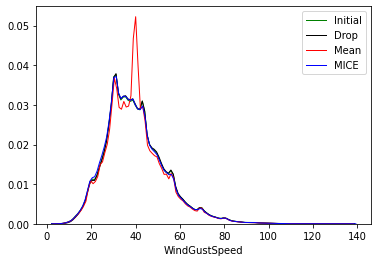

In [0]:
# initial - green
sns.distplot(df_final["WindGustSpeed"], hist=False, label='Initial', kde=True, 
             color = 'green', kde_kws={'linewidth': 1})

# drop empty data - black 
sns.distplot(data_deletion_df["WindGustSpeed"], hist = False, label='Drop', 
             kde = True, color = 'black', kde_kws = {'linewidth': 1})

# fill with mean - red
sns.distplot(mean_imputation_df["WindGustSpeed"], hist = False, label='Mean',
             kde = True, color = 'red', kde_kws = {'linewidth': 1})

# fill with MICE - blue
sns.distplot(mice_imputation_df["WindGustSpeed"], hist=False, label='MICE', kde = True,
             color = 'blue', kde_kws = {'linewidth': 1})


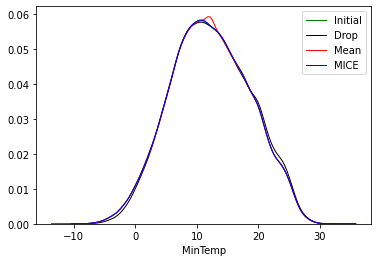

In [0]:
# initial - green
sns.distplot(df_final["MinTemp"], hist=False, label='Initial', kde=True, 
             color = 'green', kde_kws={'linewidth': 1})

# drop empty data - black 
sns.distplot(data_deletion_df["MinTemp"], hist = False, label='Drop', 
             kde = True, color = 'black', kde_kws = {'linewidth': 1})

# fill with mean - red
sns.distplot(mean_imputation_df["MinTemp"], hist = False, label='Mean',
             kde = True, color = 'red', kde_kws = {'linewidth': 1})

# fill with MICE - blue
sns.distplot(mice_imputation_df["MinTemp"], hist=False, label='MICE', kde = True,
             color = 'blue', kde_kws = {'linewidth': 1})

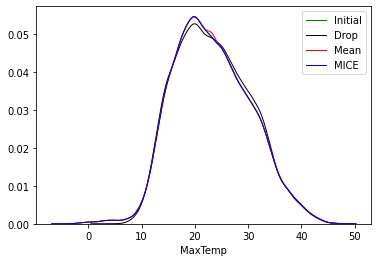

In [0]:
# initial - green
sns.distplot(df_final["MaxTemp"], hist=False, label='Initial', kde=True, 
             color = 'green', kde_kws={'linewidth': 1})

# drop empty data - black 
sns.distplot(data_deletion_df["MaxTemp"], hist = False, label='Drop', 
             kde = True, color = 'black', kde_kws = {'linewidth': 1})

# fill with mean - red
sns.distplot(mean_imputation_df["MaxTemp"], hist = False, label='Mean',
             kde = True, color = 'red', kde_kws = {'linewidth': 1})

# fill with MICE - blue
sns.distplot(mice_imputation_df["MaxTemp"], hist=False, label='MICE', kde = True,
             color = 'blue', kde_kws = {'linewidth': 1})

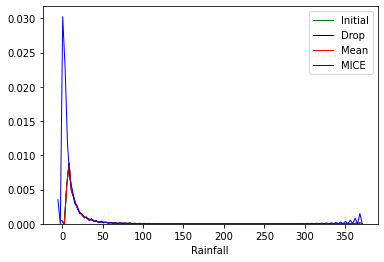

In [0]:
# initial - green
sns.distplot(df_final["Rainfall"], hist=False, label='Initial', kde=True, 
             color = 'green', kde_kws={'linewidth': 1})

# drop empty data - black 
sns.distplot(data_deletion_df["Rainfall"], hist = False, label='Drop', 
             kde = True, color = 'black', kde_kws = {'linewidth': 1})

# fill with mean - red
sns.distplot(mean_imputation_df["Rainfall"], hist = False, label='Mean',
             kde = True, color = 'red', kde_kws = {'linewidth': 1})

# fill with MICE - blue
sns.distplot(mice_imputation_df["Rainfall"], hist=False, label='MICE', kde = True,
             color = 'blue', kde_kws = {'linewidth': 1})

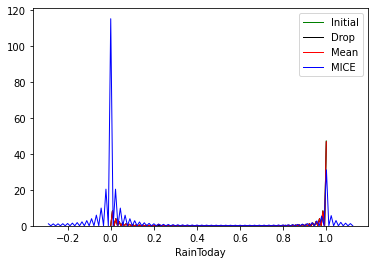

In [0]:
# initial - green
sns.distplot(df_final["RainToday"], hist=False, label='Initial', kde=True, 
             color = 'green', kde_kws={'linewidth': 1})

# drop empty data - black 
sns.distplot(data_deletion_df["RainToday"], hist = False, label='Drop', 
             kde = True, color = 'black', kde_kws = {'linewidth': 1})

# fill with mean - red
sns.distplot(mean_imputation_df["RainToday"], hist = False, label='Mean',
             kde = True, color = 'red', kde_kws = {'linewidth': 1})

# fill with MICE - blue
sns.distplot(mice_imputation_df["RainToday"], hist=False, label='MICE', kde = True,
             color = 'blue', kde_kws = {'linewidth': 1})